In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


In [130]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the data

In [131]:
df_train = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [132]:
df_test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [135]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

 There are no null values

In [136]:
print(df_train.shape)
print(df_test.shape)

(381109, 12)
(127037, 11)


In [137]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Exploratory data analysis

# Univariate analysis of categorical variable

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

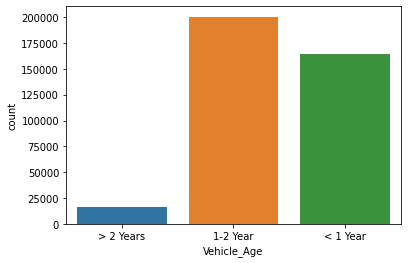

In [138]:
sns.countplot(df_train['Vehicle_Age']) #checking the number of vehicles in different age range

**The plots depicts that most of the vehicle taken in the data is 1-2 years old**

In [139]:
vehicle_age=df_train.groupby(['Vehicle_Age','Response'])['id'].count()
response=vehicle_age.to_frame().rename(columns={'id':'count'}).reset_index()
response

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


**For the better visualization of this dataframe we can use a bar plot and compare the responses**

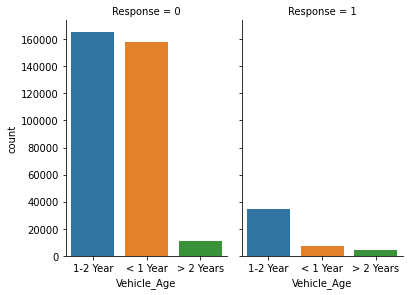

In [140]:
sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=response, kind="bar",
                height=4, aspect=.7)

**The plot shows irrespective of the response we have more vehicles age 1-2 year followed by 1 year and there is an imbalance in the data**  

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

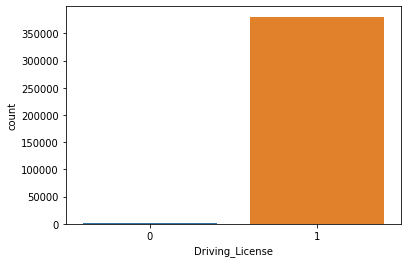

In [141]:
sns.countplot(df_train['Driving_License'])


**Most of the people have the driving license**

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

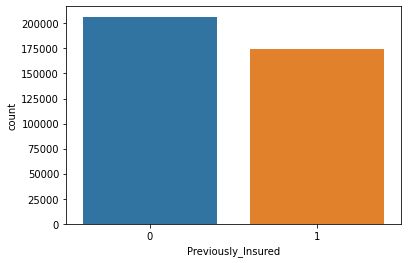

In [142]:
sns.countplot(df_train['Previously_Insured'])

**Most of the people have not previously insured than the other people who have insured**

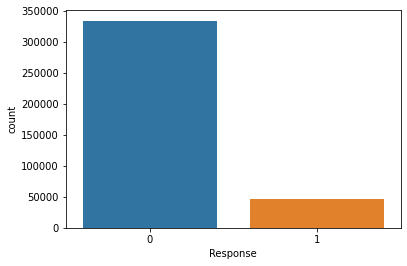

In [143]:
sns.countplot(df_train['Response'])
plt.show()

**The data is highly imbalanced. We are going to use this target variable to predict the model**

# UNIVARIATE ANALYSIS OF CONTINUOUS VARIABLES

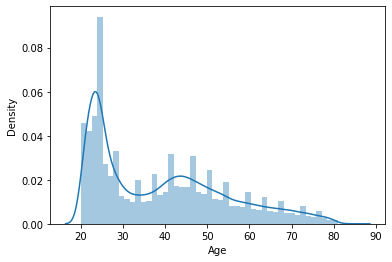

In [144]:
sns.distplot(x=df_train['Age'])
plt.xlabel('Age')
plt.show()

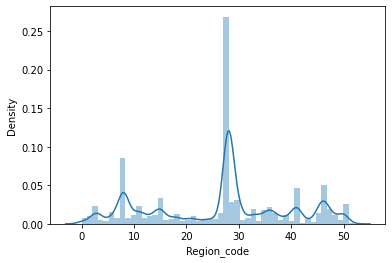

In [145]:
sns.distplot(x=df_train['Region_Code'])
plt.xlabel('Region_code')
plt.show()

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

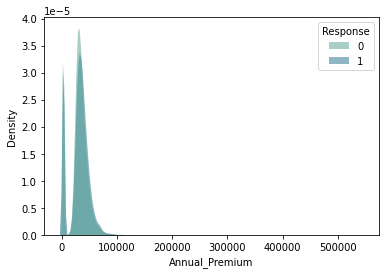

In [146]:
sns.kdeplot(
   data=df_train, x="Annual_Premium", hue="Response",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Density'>

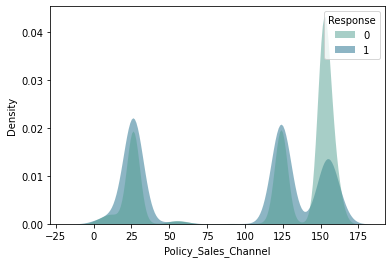

In [147]:
sns.kdeplot(
   data=df_train, x="Policy_Sales_Channel", hue="Response",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0)

# CHECK FOR SKEWNESS OF THE CONTINUOUS VARIABLE

1.If skewness is 0, the data are perfectly symmetrical

2.If skewness is less than -1 or greater than 1, the distribution is highly skewed.

3.If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

4.If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [148]:
from scipy.stats import skew
print(skew(df_train['Age']))
print(skew(df_train['Annual_Premium']))
print(skew(df_train['Vintage']))
print(skew(df_train['Policy_Sales_Channel']))

0.6725363506891485
1.7660802637778974
0.003029504966164472
-0.900004581180819


**Annual premium is highly skewed**

**policy sales is approximately symmetric**

**Vintage is perfectly symmetrical**

### Dealing with skewness

# Log method

In [149]:
age_log = np.log(df_train['Age']).skew()
annual_log = np.log(df_train['Annual_Premium']).skew()
policy_log = np.log(df_train['Policy_Sales_Channel']).skew()

# Square Root

In [150]:
age_sqrt = np.sqrt(df_train['Age']).skew()
annual_sqrt = np.sqrt(df_train['Annual_Premium']).skew()
policy_sqrt = np.sqrt(df_train['Policy_Sales_Channel']).skew()

# Cox box transform

In [151]:
from scipy import stats
age_box = pd.Series(stats.boxcox(df_train['Age'])[0]).skew()
annual_box = pd.Series(stats.boxcox(df_train['Annual_Premium'])[0]).skew()
policy_box = pd.Series(stats.boxcox(df_train['Policy_Sales_Channel'])[0]).skew()

In [152]:
skew_df = pd.DataFrame()
skew_df['column_name'] = ['Age','Annual_Premium','Policy_Sales_Channel']
skew_df['Before Transformation'] = [df_train['Age'].skew(),df_train['Annual_Premium'].skew(), df_train['Policy_Sales_Channel'].skew()]
skew_df['Log'] = [age_log, annual_log, policy_log]
skew_df['Sqrt'] = [age_sqrt, annual_sqrt, policy_sqrt]
skew_df['boxcox']= [age_box, annual_box, policy_box]
skew_df

,column_name,Before Transformation,Log,Sqrt,boxcox
0,Age,0.672539,0.204487,0.426061,0.062216
1,Annual_Premium,1.766087,-1.470648,-0.791948,0.083146
2,Policy_Sales_Channel,-0.900008,-1.487651,-1.031655,-0.801581


**By comparing the skewness values of all method we found out boxcox is the best method**

# Dealing with categorical variable

In [153]:
def transform(df):
    # transform continous variable
    df['Age'] = pd.Series(stats.boxcox(df['Age'])[0])
    df['Annual_Premium'] = pd.Series(stats.boxcox(df['Annual_Premium'])[0])
    df['Policy_Sales_Channel'] = pd.Series(stats.boxcox(df['Policy_Sales_Channel'])[0])
    
    # transfrom discrete variable
    df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1, 'No':0})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

In [154]:
train_df = transform(df_train)
test_df = transform(df_test)

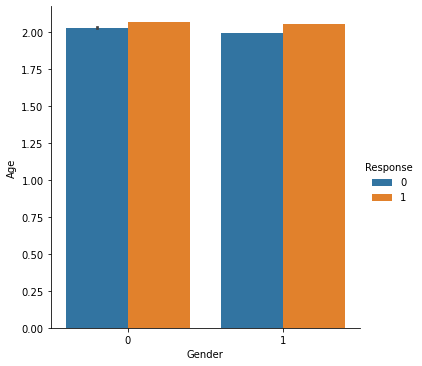

In [155]:
sns.catplot(x='Gender', y='Age', hue='Response',kind = 'bar',data = train_df)

**The plot depicts that among the male and female both are showing their interests towards the vehicle insurance(response1)**

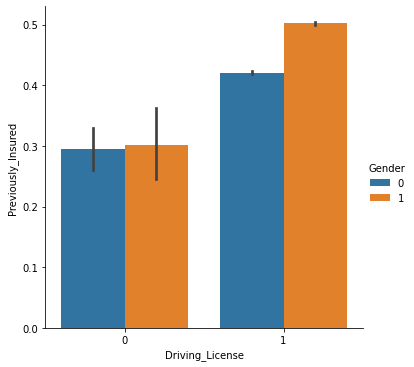

In [156]:
sns.catplot(x = 'Driving_License', y = 'Previously_Insured', hue = 'Gender', kind = 'bar', data = train_df)

**Mostly female have the driving license than the male**

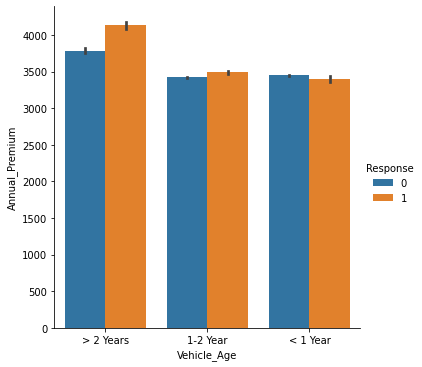

In [157]:
sns.catplot(x='Vehicle_Age', y='Annual_Premium', hue='Response', kind = 'bar', data = train_df)

**People have shown interest in the vehicle age insurance for greater than 2 years(response1)**

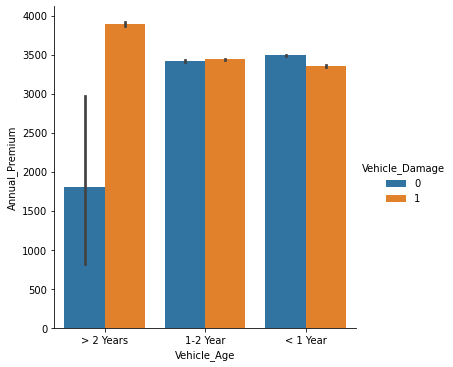

In [158]:
sns.catplot(x='Vehicle_Age', y='Annual_Premium', hue='Vehicle_Damage', kind = 'bar', data = train_df)

**This shows that people are having vehicle damage greater than 2 years and are paying higher annual premium than the people who are not having vehicle damage**

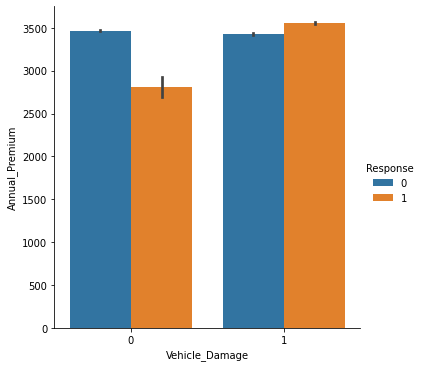

In [159]:
sns.catplot(x='Vehicle_Damage', y='Annual_Premium', hue='Response', kind = 'bar', data = train_df)

**Among the people who had no vehicle damage people who are not interested in vehicle insurance are paying more than the one who are interested in vehicle insurance**

**Among the people who had vehicle damage people who are interested in vehicle insurance are paying more than the one who are not interested in vehicle insurance**

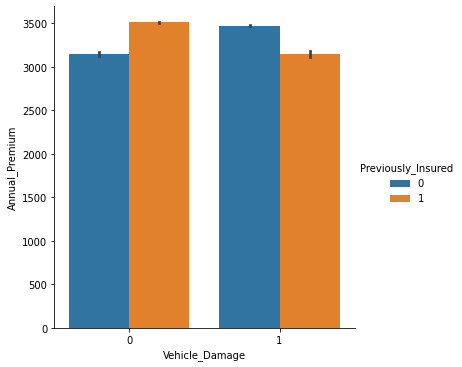

In [160]:
sns.catplot(x='Vehicle_Damage', y='Annual_Premium', hue='Previously_Insured', kind = 'bar', data = train_df)

**Among the people who are not having vehicle damage who have not previously insured are paying lesser annual premium than those who are previously insured**

**People who are having vehicle damage who have previously insured are paying less premium than the ones who have not insured**

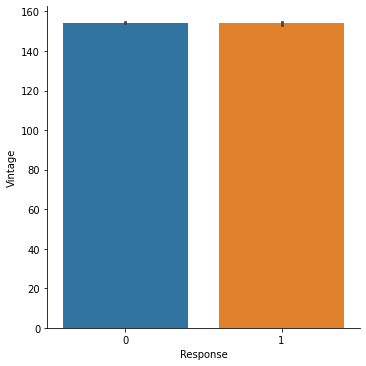

In [161]:
sns.catplot(x='Response', y="Vintage", kind="bar", data=train_df)

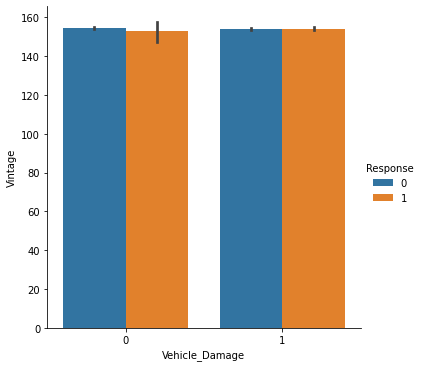

In [162]:
sns.catplot(x='Vehicle_Damage', y='Vintage', hue='Response', kind = 'bar', data = train_df)

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

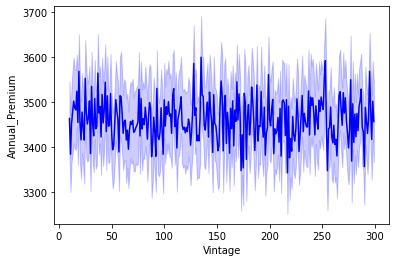

In [163]:
sns.lineplot(data= train_df, x='Vintage',y='Annual_Premium', color='blue')

# Modelling

## Model 1 - Logistic regression

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
def transform_for_modelling(df):
    dummy = pd.get_dummies(df['Vehicle_Age'])
    df = pd.concat([df,dummy],axis = 1)
    df = df.drop('Vehicle_Age',axis = 1)
    return df
    

In [166]:
train_data = transform_for_modelling(train_df)
test_data = transform_for_modelling(test_df)

In [167]:
x = train_data.drop(['Response','id'], axis = 1)
y = train_data['Response']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [169]:
X_train.shape, X_test.shape

((255343, 12), (125766, 12))

In [170]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

result_df = pd.DataFrame(columns=['Model_Name', 'Accuracy_score_train', 'roc_auc_score_train','f1_score_train','precision_score_train', 
                                  'recall_score_train','Accuracy_score_test', 'roc_auc_score_test','f1_score_test', 'precision_score_test', 'recall_score_test'  ])

result_df

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test


In [171]:
def model_score_card(algo,  name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    #train datset
    y_train_pred = algo.predict(X_train)
    y_train_proba = algo.predict_proba(X_train)[::, 1]
    
    #test datset
    y_test_pred = algo.predict(X_test)
    y_test_proba = algo.predict_proba(X_test)[::, 1]
    
    global result_df
    
    result_df = result_df.append({'Model_Name' : name,
                                    
                                    'Accuracy_score_train' :accuracy_score(y_train, y_train_pred) ,
                                    'roc_auc_score_train' : roc_auc_score(y_train, y_train_proba),
                                    'f1_score_train' : f1_score(y_train, y_train_pred), 
                                    'precision_score_train' : precision_score(y_train, y_train_pred), 
                                    'recall_score_train' : recall_score(y_train, y_train_pred),
                                    
                                    'Accuracy_score_test':accuracy_score(y_test, y_test_pred),
                                      'f1_score_test' :f1_score(y_test, y_test_pred) ,
                                    'roc_auc_score_test' : roc_auc_score(y_test, y_test_proba),
                                     
                                    'precision_score_test' : precision_score(y_test, y_test_pred), 
                                    'recall_score_test' : recall_score(y_test, y_test_pred)}, ignore_index = True)
    
    return result_df

In [172]:
def model_eval(algo,  X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    #train datset
    y_train_pred = algo.predict(X_train)
    y_train_proba = algo.predict_proba(X_train)[::, 1]

    print('Train dataset :')
    print('Confusion matrix :\n', confusion_matrix(y_train, y_train_pred))
    print('Accuracy :',accuracy_score(y_train, y_train_pred) )
    print('AUC score :', roc_auc_score(y_train, y_train_proba))
    print('F1-score :', f1_score(y_train, y_train_pred))
    print('Precision score :', precision_score(y_train, y_train_pred))
    print('Recall score :', recall_score(y_train, y_train_pred))
    
    #test datset
    y_test_pred = algo.predict(X_test)
    y_test_proba = algo.predict_proba(X_test)[::, 1]
    print('\n\nTest dataset :')
    print('Confusion matrix :\n', confusion_matrix(y_test, y_test_pred))
    print('Accuracy :',accuracy_score(y_test, y_test_pred) )
    print('AUC score :', roc_auc_score(y_test, y_test_proba))
    print('F1-score :', f1_score(y_test, y_test_pred))
    print('Precision score :', precision_score(y_test, y_test_pred))
    print('Recall score :', recall_score(y_test, y_test_pred))

In [173]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear',random_state=4)

model_eval(lor)

Train dataset :
Confusion matrix :
 [[224148      0]
 [ 31195      0]]
Accuracy : 0.8778309959544612
AUC score : 0.8261236567407407
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0


Test dataset :
Confusion matrix :
 [[110251      0]
 [ 15515      0]]
Accuracy : 0.8766359747467519
AUC score : 0.8292841252488724
F1-score : 0.0
Precision score : 0.0
Recall score : 0.0


In [174]:
model_score_card(lor, 'Logistic Regression')

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test
0,Logistic Regression,0.877831,0.826124,0.0,0.0,0.0,0.876636,0.829284,0.0,0.0,0.0


## Model 2-Smote with feature selection

In [175]:
from sklearn.feature_selection import RFE, RFECV

#estimator used is LogisticRegression
lor = LogisticRegression(solver='liblinear',random_state=4)

#RUN RFECV to find out the best number of features to be selected
rfe_n = RFECV(estimator=lor, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
rfe_n.fit(X_train, y_train)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFECV(cv=3, estimator=LogisticRegression(random_state=4, solver='liblinear'),
      n_jobs=-1, scoring='roc_auc', verbose=2)

In [176]:
#Number
print('Number of features selected :', rfe_n.n_features_)
#Selected features
selected = list(X_train.columns[rfe_n.support_])
print('\nSelected features :',selected)

Number of features selected : 7

Selected features : ['Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', '1-2 Year', '< 1 Year', '> 2 Years']


In [177]:
#selecting only features from RFE in both train & test dataset

X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

In [178]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

#SMOTE analysis on train dataset
X_train_sm, y_train_sm = smote.fit_resample(X_train_sel, y_train)

print('Shape of X train', X_train_sm.shape)

print('\nCount of target variable :')
print(y_train_sm.value_counts())
#after smote analysis, target variable is equally distributed

Shape of X train (448296, 7)

Count of target variable :
0    224148
1    224148
Name: Response, dtype: int64


In [179]:
#building LogisticRegression on smote analysed data
lor = LogisticRegression(solver='liblinear',random_state=4)

#Model evaluation
model_eval(lor, X_train_sm,X_test_sel, y_train_sm, y_test)

Train dataset :
Confusion matrix :
 [[132637  91511]
 [  5776 218372]]
Accuracy : 0.7829849028320574
AUC score : 0.8317746606984391
F1-score : 0.8178251824332295
Precision score : 0.7046917707650953
Recall score : 0.9742313114549316


Test dataset :
Confusion matrix :
 [[65460 44791]
 [  395 15120]]
Accuracy : 0.6407137064071371
AUC score : 0.8330372938346615
F1-score : 0.4009227587304112
Precision score : 0.2523743552936856
Recall score : 0.9745407669996777


In [180]:
## Appending the evaluation metrics in a DataFrame for further reference
##This is the final base model
model_score_card(lor, 'Logistic Regression smote with feature selection', X_train_sm,X_test_sel, y_train_sm, y_test)

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test
0,Logistic Regression,0.877831,0.826124,0.000000,0.000000,0.000000,0.876636,0.829284,0.000000,0.000000,0.000000
1,Logistic Regression smote with feature selection,0.782985,0.831775,0.817825,0.704692,0.974231,0.640714,0.833037,0.400923,0.252374,0.974541


# Model 3-Random forest 

## Random forest with hyperparameter tuning

In [181]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [182]:
rfc = RandomForestClassifier(random_state=4)

params = {'n_estimators': sp_randint(50,200),
         'max_features': sp_randint(1,15),
         'min_samples_leaf' : sp_randint(1,25),
          'max_depth' : sp_randint(1,10),
         'criterion' : ['gini', 'entropy']}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, cv=3, n_iter=10,verbose=2, 
                             scoring='roc_auc', random_state=4, n_jobs=-1)
rsearch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f244d7ecad0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2464731d50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f244d7ec150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2488505b50>},
                   random_state=4, scoring='roc_auc', verbose=2)

In [183]:
#Best parameters
print(rsearch.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 10, 'n_estimators': 108}


In [184]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)

model_eval(rfc, X_train_sm, X_test_sel, y_train_sm, y_test)

Train dataset :
Confusion matrix :
 [[143782  80366]
 [ 12832 211316]]
Accuracy : 0.7921061084640505
AUC score : 0.8450906065262325
F1-score : 0.819324195956032
Precision score : 0.7244739133714113
Recall score : 0.9427521102128951


Test dataset :
Confusion matrix :
 [[71136 39115]
 [  905 14610]]
Accuracy : 0.6817899909355469
AUC score : 0.8447072844385
F1-score : 0.4220103986135182
Precision score : 0.2719404374127501
Recall score : 0.941669352239768


In [185]:
## Appending the evaluation metrics in a DataFrame for further reference

rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)

model_score_card(rfc, 'RandomForestClassifier HyperParameter-tuning', X_train_sm,X_test_sel, y_train_sm, y_test)

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test
0,Logistic Regression,0.877831,0.826124,0.000000,0.000000,0.000000,0.876636,0.829284,0.000000,0.000000,0.000000
1,Logistic Regression smote with feature selection,0.782985,0.831775,0.817825,0.704692,0.974231,0.640714,0.833037,0.400923,0.252374,0.974541
2,RandomForestClassifier HyperParameter-tuning,0.792106,0.845091,0.819324,0.724474,0.942752,0.681790,0.844707,0.422010,0.271940,0.941669


# Model -4 Naive Bayes

## GaussianNB SMOTE analysis

In [186]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve

In [187]:
nb = GaussianNB()

model_eval(nb, X_train_sm, X_test_sel, y_train_sm, y_test)

#Recall is increased but the model is over fitted, so we cant consider this model

Train dataset :
Confusion matrix :
 [[138193  85955]
 [  8120 216028]]
Accuracy : 0.7901498117315345
AUC score : 0.8171542459428891
F1-score : 0.8211947214667069
Precision score : 0.715364772189163
Recall score : 0.9637739350786088


Test dataset :
Confusion matrix :
 [[68194 42057]
 [  536 14979]]
Accuracy : 0.6613313614172351
AUC score : 0.8180969260096873
F1-score : 0.41292332290388833
Precision score : 0.26262360614348834
Recall score : 0.9654527876248792


In [188]:
## Appending the evaluation metrics in a DataFrame for further reference

nb = GaussianNB()

model_score_card(nb, 'Gaussian Nb with smote', X_train_sm,X_test_sel, y_train_sm, y_test)

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test
0,Logistic Regression,0.877831,0.826124,0.000000,0.000000,0.000000,0.876636,0.829284,0.000000,0.000000,0.000000
1,Logistic Regression smote with feature selection,0.782985,0.831775,0.817825,0.704692,0.974231,0.640714,0.833037,0.400923,0.252374,0.974541
2,RandomForestClassifier HyperParameter-tuning,0.792106,0.845091,0.819324,0.724474,0.942752,0.681790,0.844707,0.422010,0.271940,0.941669
3,Gaussian Nb with smote,0.790150,0.817154,0.821195,0.715365,0.963774,0.661331,0.818097,0.412923,0.262624,0.965453


# Overall results of the models built

In [189]:
result_df

,Model_Name,Accuracy_score_train,roc_auc_score_train,f1_score_train,precision_score_train,recall_score_train,Accuracy_score_test,roc_auc_score_test,f1_score_test,precision_score_test,recall_score_test
0,Logistic Regression,0.877831,0.826124,0.000000,0.000000,0.000000,0.876636,0.829284,0.000000,0.000000,0.000000
1,Logistic Regression smote with feature selection,0.782985,0.831775,0.817825,0.704692,0.974231,0.640714,0.833037,0.400923,0.252374,0.974541
2,RandomForestClassifier HyperParameter-tuning,0.792106,0.845091,0.819324,0.724474,0.942752,0.681790,0.844707,0.422010,0.271940,0.941669
3,Gaussian Nb with smote,0.790150,0.817154,0.821195,0.715365,0.963774,0.661331,0.818097,0.412923,0.262624,0.965453


# Feature importance

In [190]:
from sklearn.inspection import permutation_importance

In [191]:
imps = permutation_importance(nb, X_test_sel, y_test)
print(imps.importances_mean)

features = list(X_test_sel.columns)

[ 0.01559563  0.00066314 -0.08712371 -0.07910405  0.01090597  0.01176312
  0.00085715]


In [192]:
# Print the feature ranking
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_test_sel.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. Age (0.015596)
2. < 1 Year (0.011763)
3. 1-2 Year (0.010906)
4. > 2 Years (0.000857)
5. Driving_License (0.000663)
6. Vehicle_Damage (-0.079104)
7. Previously_Insured (-0.087124)


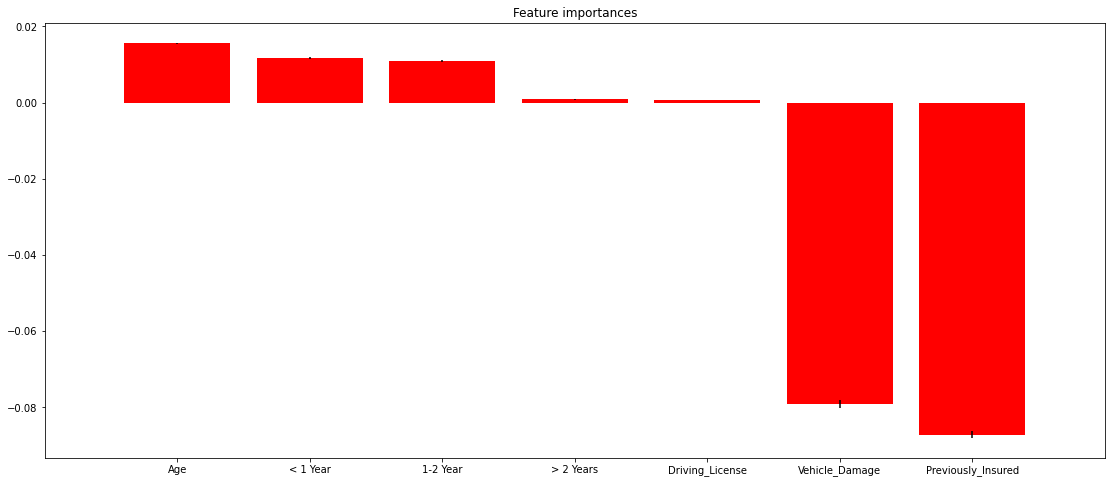

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 8))
plt.title("Feature importances")
plt.bar(range(X_test_sel.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test_sel.shape[1]), [features[indices[i]] for i in range(7)])
plt.xlim([-1, X_test_sel.shape[1]])
plt.show()

# Conclusion

**1.We have done the logistic regression model with precision and recall score giving 0
which means the machine is not performing well**

**2.In next model we are doing logistic regression with smote with feature selection**
    
    a) We have performed recursive feature elimination and selected out the best 7 features     
   
    b) smote means synthetic minority oversampling technique.It is one of the best way to deal with imbalance dataset.With the result of smote we are getting equal count of class 0 and 1 in the target variable and it has given recall score of 97% and the model has improved than the previous model.

**3.In the next model we have performed random forest with hyperparameter tuning and randomizedsearch is being performed, selecting out best parameters and its results gave recall score of 94%**

**4.In the next model we have done gaussian nb with smote analysis and its results gave recall score of 96%**
    
**5.Among all the models all being performed I feel gaussian nb is the best model even though the model tends to be overfitting**

**6.In the feature importance only 5 features are proportional to the target variable with vehicle damaged and previously insured are being inversely proportional to the target variable**